## Project Objective:
We are building a loan status prediction system using support vector machine based on the loan applicant's gender, marrital status, number of dependents, etc. 

The system is at the end of the notebook. Please feel free to try it out!

## Workflow
1. Data Collection
2. Data Pre-Processing
3. Train Test Split
4. Model Training: Support Vector Machine model
5. Model Test and Prediction

### Importing the Dependencies

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import svm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Data Collection and Pre-Processing

In [2]:
# loading the dataset to a pandas Dataframe
loan_dataset = pd.read_csv('LoanInfo.csv')

In [3]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns in this dataset
loan_dataset.shape

(614, 13)

In [5]:
loan_dataset.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [6]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# count the number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [10]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
loan_dataset.shape

(480, 13)

In [36]:
# label encoding
loan_dataset.replace({"Loan_Status": {'N': 0, 'Y': 1}}, inplace = True)

In [37]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [14]:
# replacing the value of 3+ dependents to 4
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace(to_replace = '3+', value = 4)

In [15]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [16]:
loan_dataset['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: count, dtype: int64

In [17]:
loan_dataset['Credit_History'].value_counts()

Credit_History
1.0    410
0.0     70
Name: count, dtype: int64

### Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

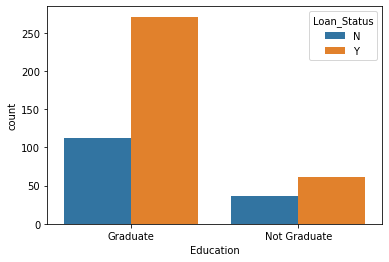

In [18]:
# eduction & loan status
sns.countplot(x = 'Education', hue = 'Loan_Status', data = loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

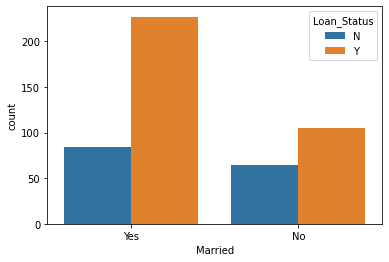

In [19]:
# marital status & loan status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_dataset)

In [20]:
loan_dataset.Property_Area.value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [21]:
loan_dataset.Education.value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

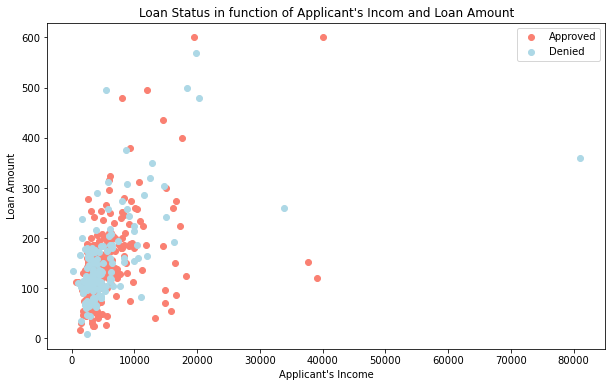

In [24]:
# Create another figure
plt.figure(figsize = (10, 6))

# Scatter with positive examples
plt.scatter(loan_dataset.ApplicantIncome[loan_dataset.Loan_Status == 'Y'], loan_dataset.LoanAmount[loan_dataset.Loan_Status == 'Y'], c = 'salmon');

# Scatter with negative examples
plt.scatter(loan_dataset.ApplicantIncome[loan_dataset.Loan_Status == 'N'], loan_dataset.LoanAmount[loan_dataset.Loan_Status == 'N'], c = 'lightblue');

# Add some helpful info
plt.title("Loan Status in function of Applicant's Incom and Loan Amount")
plt.xlabel("Applicant's Income")
plt.ylabel('Loan Amount')
plt.legend(['Approved', 'Denied']);

In [ ]:
# convert categorical columns to numerical values
# Method 1: replace(); not recommended
loan_dataset.replace({'Married': {'No': 0, 'Yes': 1}, 
                      'Gender': {'Male': 1, 'Female': 0}, 
                      'Self_Employed': {'No': 0, 'Yes': 1},
                      'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 
                      'Education': {'Graduate': 1, 'Not Graduate': 0}},
                     inplace = True)

In [38]:
# seperating the data and the label
X = loan_dataset.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = loan_dataset['Loan_Status']

In [43]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban


In [44]:
Y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [39]:
# convert data to numbers; turn the categories into numbers
# Method 2: OneHotEncoder

categorical_features = ['Married', 'Gender', 'Self_Employed', 'Property_Area', 'Education']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)

In [40]:
transformed_X

array([[0.0, 1.0, 0.0, ..., 128.0, 360.0, 1.0],
       [0.0, 1.0, 0.0, ..., 66.0, 360.0, 1.0],
       [0.0, 1.0, 0.0, ..., 120.0, 360.0, 1.0],
       ...,
       [0.0, 1.0, 0.0, ..., 253.0, 360.0, 1.0],
       [0.0, 1.0, 0.0, ..., 187.0, 360.0, 1.0],
       [1.0, 0.0, 1.0, ..., 133.0, 360.0, 0.0]], dtype=object)

In [42]:
transformed_X_test = pd.DataFrame(transformed_X)
transformed_X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,4583,1508.0,128.0,360.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,3000,0.0,66.0,360.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,2583,2358.0,120.0,360.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,6000,0.0,141.0,360.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2,5417,4196.0,267.0,360.0,1.0


### Train Test Split

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [47]:
transformed_X.shape, X_train.shape, X_test.shape

((480, 17), (432, 17), (48, 17))

In [48]:
Y.shape, Y_train.shape, Y_test.shape

((480,), (432,), (48,))

### Training the model: Support Vector Machine Model

In [49]:
classifier = svm.SVC(kernel = 'linear')

In [50]:
# training the support vector machine model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### Model Evaluation

In [51]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_accuracy

0.7939814814814815

In [52]:
print('Accuracy on training data:', training_data_accuracy)
# the accuracy score can be improved by increasing the size of the sample

Accuracy on training data: 0.7939814814814815


In [53]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data:', test_data_accuracy)

Accuracy on test data: 0.8333333333333334


### Making a predictive system

In [93]:
# enter a loan applicant's info
user_gender = input('Are you a lady (Female) or a gentleman (Male)? ')
uer_marrital_status = input('May I ask if you are married? Married (Yes) or Not yet (No)')
user_dependent = input('May I ask how many number of dependents you have? ')
user_educ = input("Have you graduated from college? Yes (Graduate) or No (Not Graduate) ")
user_employ = input('Are you self-employed? Yes or No ')
user_income = input('What is your monthly income ($)? ')
user_co_income = input("What is your co-applicant's monthly income ($)? ")
user_amount = input('How much do you want to loan from us ($)? ')
user_term = input("What loan term (months) do you have in mind? For example, if you want a 30-year loan, please type '360'. ")
user_his = input('In your opinion, do you have a great credit history? Yes (1) or No (0)')
user_property = input('To what area does the property you want to purchase belong? Rural, Semiurban, or Urban ')

user_info = (user_gender, uer_marrital_status, user_dependent, user_educ, user_employ, 
             user_income, user_co_income, float(user_amount)/1000, user_term, user_his, user_property)
user_input = np.asarray(user_info)
user_input_reshape = user_input.reshape(1, -1)
user_input_reshape_df = pd.DataFrame(user_input_reshape, columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                                                          'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                                                          'Loan_Amount_Term','Credit_History',
                                                          'Property_Area' ])
transformed_user_input = transformer.transform(user_input_reshape_df)

user_prediction = classifier.predict(transformed_user_input)
print('\n')

if user_prediction[0] == 1:
    print('Congratuations! Your loan has been approved! ')
else:
    print("Apologies but we currently can't approve your loan. Please see an associate for more assistance. Thank you. ")


Are you a lady (Female) or a gentleman (Male)? Male
May I ask if you are married? Married (Yes) or Not yet (No)Yes
May I ask how many number of dependents you have? 1
Have you graduated from college? Yes (Graduate) or No (Not Graduate) Graduate
Are you self-employed? Yes or No No
What is your monthly income ($)? 4583
What is your co-applicant's monthly income ($)? 1508
How much do you want to loan from us ($)? 128
What loan term (months) do you have in mind? For example, if you want a 30-year loan, please type '360'. 360
In your opinion, do you have a great credit history? Yes (1) or No (0)1
To what area does the property you want to purchase belong? Rural, Semiurban, or Urban Rural


Congratuations! Your loan has been approved! 
